<a href="https://colab.research.google.com/github/calarconf/computacion-visual/blob/main/taller10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

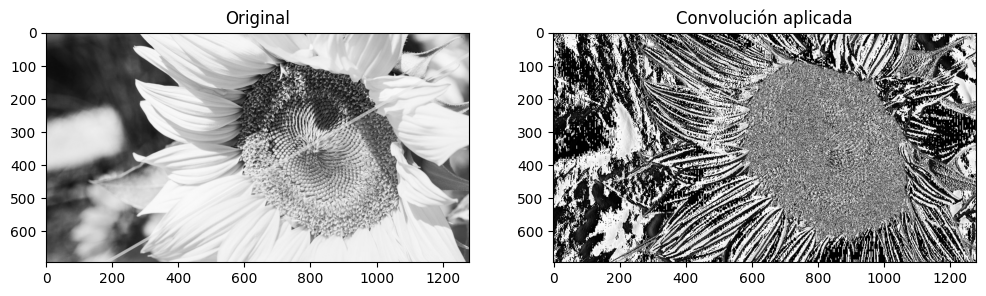

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
image_path = "/content/GirasolGrises.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Función de convolución 2D manual
def convolucion2d(imagen, kernel):
    """
    Aplica una convolución 2D manualmente usando NumPy
    Args:
        imagen: Matriz 2D de la imagen en escala de grises
        kernel: Matriz 2D del kernel de convolución (debe tener dimensiones impares)
    Returns:
        Matriz 2D con el resultado de la convolución
    """
    # Verificar que el kernel tenga dimensiones impares
    if len(kernel.shape) != 2 or kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("El kernel debe ser una matriz 2D con dimensiones impares")

    # Obtener dimensiones
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Añadir padding a la imagen
    padded_image = np.pad(imagen, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Crear matriz de salida
    output = np.zeros_like(imagen)

    # Aplicar convolución
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            # Extraer región de interés
            region = padded_image[i:i+k_height, j:j+k_width]
            # Aplicar kernel y sumar
            output[i, j] = np.sum(region * kernel)

    return output

# Ejemplo de uso con un kernel de detección de bordes verticales
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Aplicar convolución
resultado = convolucion2d(gray, kernel)

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(resultado, cmap='gray'), plt.title('Convolución aplicada')
plt.show()

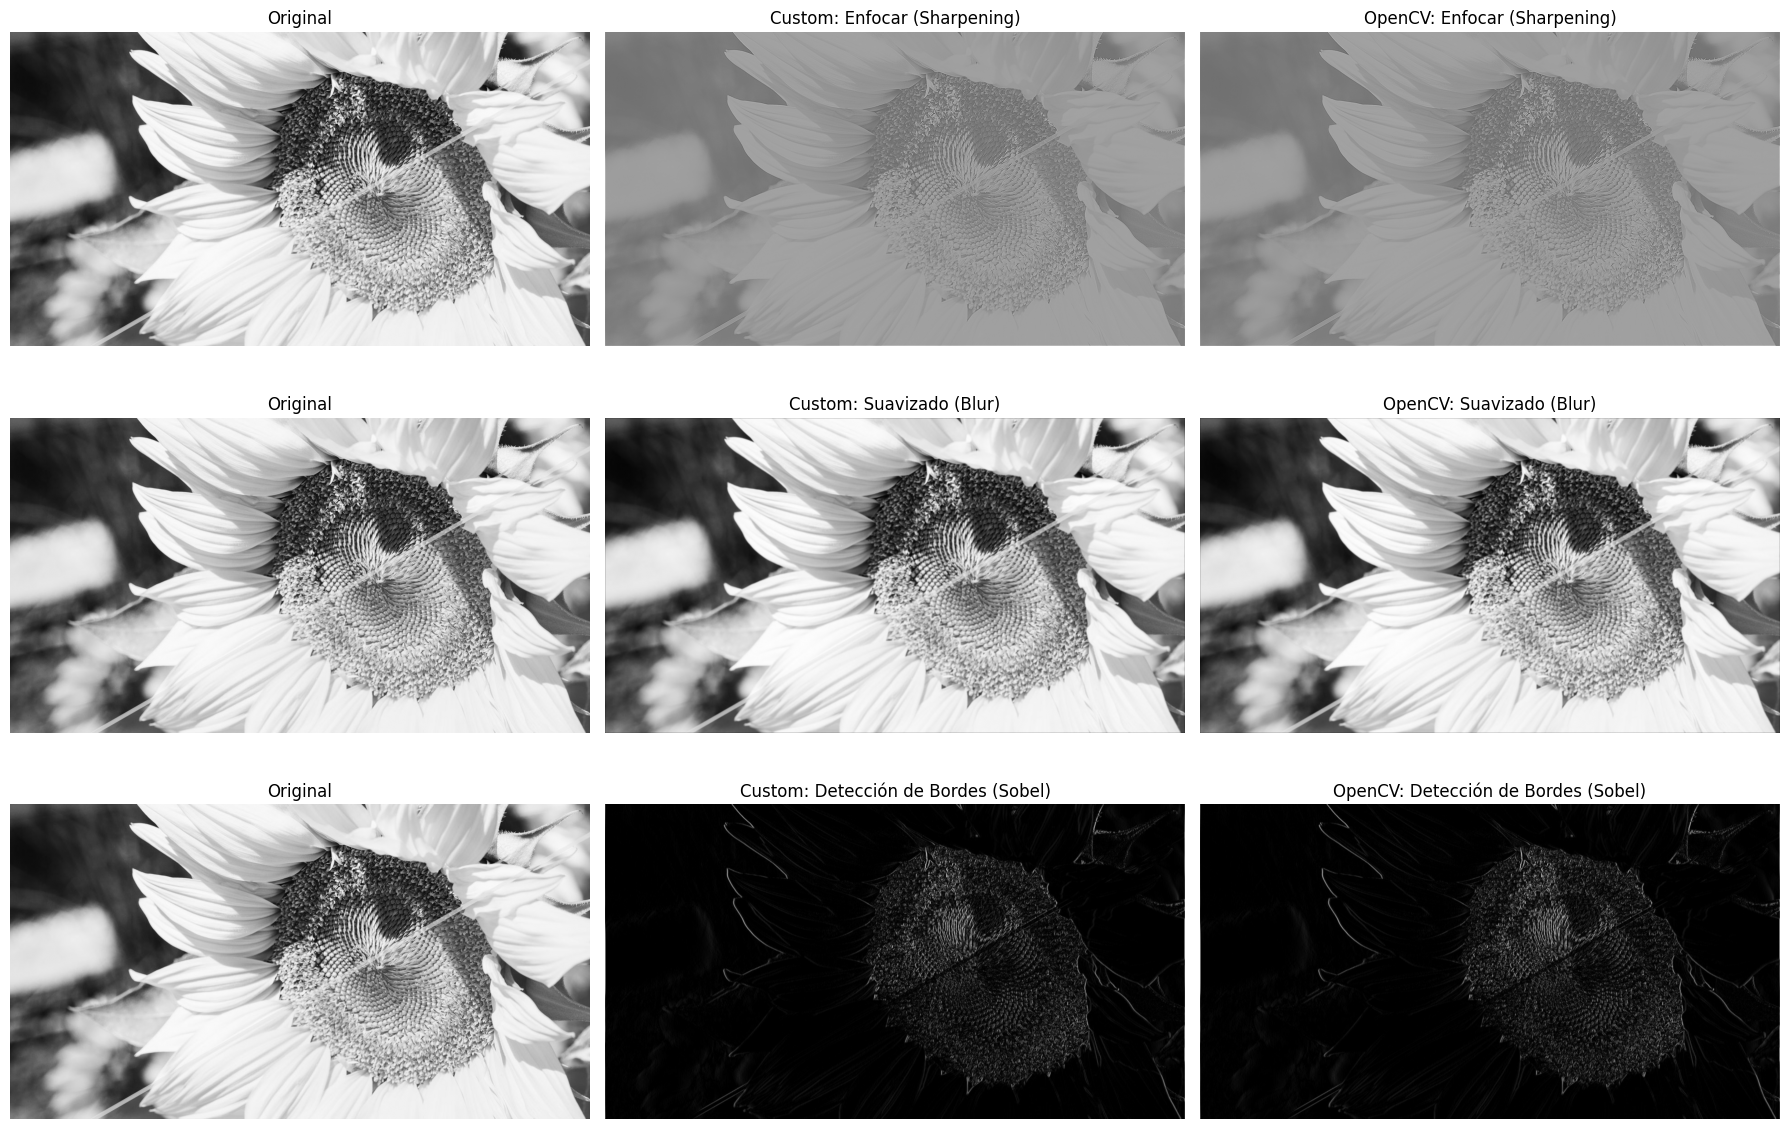


Diferencias promedio entre implementaciones:
Enfocar (Sharpening): 0.0000 pixeles
Suavizado (Blur): 0.0000 pixeles
Detección de Bordes (Sobel): 0.0000 pixeles


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
image_path = "/content/GirasolGrises.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Función de convolución mejorada (manejo de bordes y tipos de datos)
def convolucion2d(imagen, kernel):
    """
    Versión mejorada con:
    - Manejo de tipos de datos float32
    - Padding de ceros (BORDER_CONSTANT)
    - Normalización automática
    """
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Añadir padding de ceros
    padded = np.pad(imagen, ((pad_height, pad_height), (pad_width, pad_width)),
                   mode='constant')

    output = np.zeros_like(imagen)

    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            region = padded[i:i+k_height, j:j+k_width]
            output[i,j] = np.sum(region * kernel)

    return output

# Definir kernels
kernels = {
    "Enfocar (Sharpening)": np.array([
        [ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]], dtype=np.float32),

    "Suavizado (Blur)": np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]], dtype=np.float32) / 16,

    "Detección de Bordes (Sobel)": np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]], dtype=np.float32)
}

# Procesamiento y visualización
plt.figure(figsize=(18, 12))

for idx, (nombre, kernel) in enumerate(kernels.items(), 1):
    # Aplicar nuestra convolución
    custom = convolucion2d(gray, kernel)

    # Aplicar OpenCV (con mismo tipo de padding)
    opencv = cv2.filter2D(gray, cv2.CV_32F, kernel, borderType=cv2.BORDER_CONSTANT)

    # Procesamiento especial para detección de bordes
    if "Bordes" in nombre:
        custom = np.abs(custom)
        opencv = np.abs(opencv)

    # Normalización y conversión a uint8
    custom_norm = cv2.normalize(custom, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    opencv_norm = cv2.normalize(opencv, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Visualización
    plt.subplot(3, 3, 3*idx-2)
    plt.imshow(gray.astype(np.uint8), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(3, 3, 3*idx-1)
    plt.imshow(custom_norm, cmap='gray')
    plt.title(f'Custom: {nombre}')
    plt.axis('off')

    plt.subplot(3, 3, 3*idx)
    plt.imshow(opencv_norm, cmap='gray')
    plt.title(f'OpenCV: {nombre}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Análisis de diferencias numéricas
print("\nDiferencias promedio entre implementaciones:")
for nombre, kernel in kernels.items():
    custom = convolucion2d(gray, kernel)
    opencv = cv2.filter2D(gray, cv2.CV_32F, kernel, borderType=cv2.BORDER_CONSTANT)
    diferencia = np.mean(np.abs(custom - opencv))
    print(f"{nombre}: {diferencia:.4f} pixeles")